# Weather forecasting tutorial notebook
## 1 Read and visualize .nc data
.nc format is common when you deal with **LARGE** weather data, for example [ERA5](https://www.ecmwf.int/en/forecasts/dataset/ecmwf-reanalysis-v5) data. They are in general an **xarray.Dataset**

In this notebook we will show how to read and visualize this kind of data.

A more detailed guide of .nc data/xarray dataset can be found [here]((https://docs.xarray.dev/en/stable/gallery.html))

### 1.0 Load packages

In [2]:
import numpy as np
import xarray as xr # a library for working with netCDF files, see https://docs.xarray.dev/en/latest/getting-started-guide/installing.html, wee need (at least) to install "xarray[io]"
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap # an additional library for plotting in an earth coordinate, see https://matplotlib.org/basemap/stable/users/installation.html


## 1.1 Load dataset
In general, it includes **Coordinates** and **Data variables**.

We usually convert it to np array for further use. Note: if dataset is large, this may take a long time.

In [3]:
# open dataset
dataset = xr.open_dataset('your_data_path')
# dataset = xr.open_dataset('/home/data/weather/indochina_slph.nc')

# print dataset summary
dataset

<xarray.Dataset> Size: 330MB
Dimensions:                  (latitude: 161, longitude: 281, time: 1826)
Coordinates:
  * latitude                 (latitude) float32 644B 30.0 29.75 ... -9.75 -10.0
  * longitude                (longitude) float32 1kB 70.0 70.25 ... 139.8 140.0
  * time                     (time) datetime64[ns] 15kB 2018-01-01 ... 2022-1...
Data variables:
    mean_sea_level_pressure  (time, latitude, longitude) float32 330MB ...

In [8]:
# convert to numpy array
# method 1
data = dataset['mean_sea_level_pressure'].values    # change variable name
print(data.shape)
# method 2
data = np.array(dataset['mean_sea_level_pressure'])
print(data.shape)

(1826, 161, 281)
(1826, 161, 281)


## 1.2 Visualizing
This is a sample plot using Basemap, feel free to try different settings.

Text(0.5, 1.0, 'Snapshot at 2019-11-02')

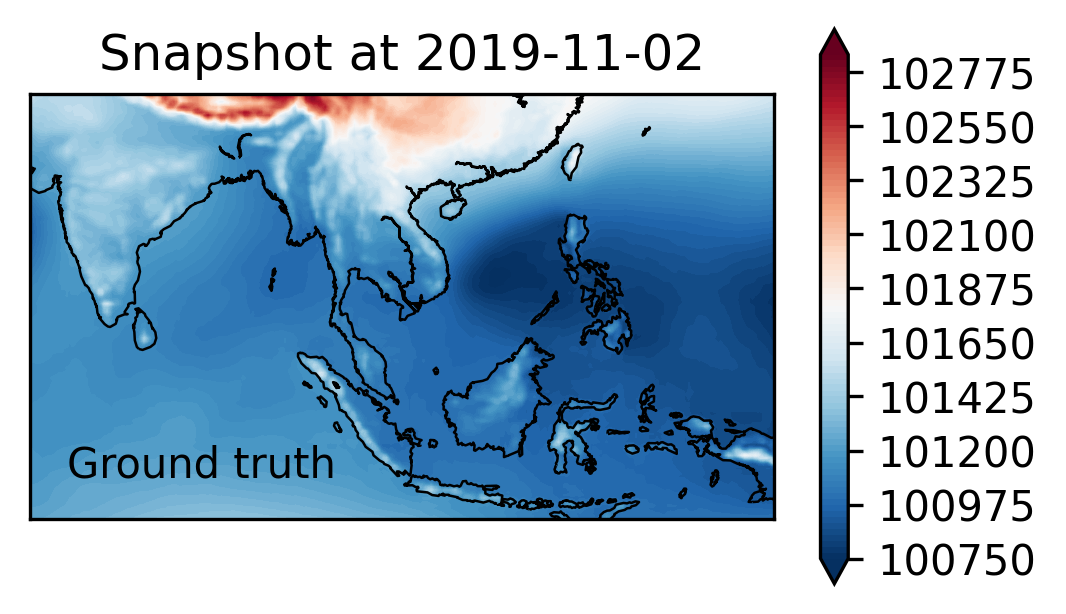

In [13]:
# choose a random snapshot to plot
idx = np.random.randint(0, data.shape[0])
snapshot = data[idx]

# get latitude and longitude
lon = dataset['longitude'].values
lat = dataset['latitude'].values
x,y = np.meshgrid(lon,lat)  # create a grid of lon-lat
llcrnrlat = min(lat)
urcrnrlat = max(lat)
llcrnrlon = min(lon)
urcrnrlon = max(lon)

# plot settings
cmap = 'RdBu_r'
linewidth = 0.6
n_levels = 100

# plot
fig = plt.figure(figsize = (4,3), dpi = 300)

m = Basemap(projection='cyl',
            llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat,   # region range
            llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon,
            resolution='l') 

m.drawcoastlines(linewidth = linewidth) # draw coastlines

im = m.contourf(x, y, snapshot, n_levels, cmap = cmap, extend = 'both')
cbar = plt.colorbar(im, shrink = 0.8)
plt.annotate('Ground truth', xy=(0.05, 0.1), xycoords='axes fraction')

# get day and time
day = dataset['time'][idx].values
day = day.astype('datetime64[D]')

plt.title(f"Snapshot at {day}")